In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sqlite3 as db

In [2]:
from pandasql import sqldf

In [3]:
pysqldf = lambda q: sqldf(q, globals())

In [4]:
colnames=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
sqladb = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=colnames, header=None)

In [5]:
sqladb.head(10)

,age,workclass,fnlwgt,education,educationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
sqladb.shape

(32561, 15)

<H3>In my PC if the rows* columns > 999 then it gets struck and gives error. So, taking only sample of the data. </H3>

In [7]:
sqladb = sqladb[:65]  

<H3> Question 1 </H3>
<H4>Select 10 records from the adult sqladb</H4>

In [8]:
pysqldf("SELECT * FROM sqladb LIMIT 10;")

,age,workclass,fnlwgt,education,educationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<H3>Question 2</H3>
<H4>2. Show me the average hours per week of all men who are working in private sector</H4>

In [116]:
# Deleting spaces in the column value so that I get correct result in the query.

sqladb["sex"] = sqladb["sex"].str.strip() 
sqladb["workclass"] = sqladb["workclass"].str.strip() 
sqladb["education"] = sqladb["education"].str.strip() 
sqladb["relationship"] = sqladb["relationship"].str.strip() 


In [121]:
pysqldf("SELECT AVG([hours-per-week]) FROM sqladb WHERE sex == 'Male' AND workclass == 'Private';")

,AVG(
0,45.060606


<H3> Question 3</H3>
<H4> Show me the frequency table for education, occupation and relationship, separately </H4>

In [122]:
# frequency table for education
pysqldf("SELECT education, COUNT(*) FROM sqladb GROUP BY education;")

,education,COUNT(*)
0,11th,4
1,5th-6th,1
2,7th-8th,2
3,9th,3
4,Assoc-acdm,3
5,Assoc-voc,4
6,Bachelors,13
7,Doctorate,2
8,HS-grad,18
9,Masters,4


In [123]:
# frequency table for occupation
pysqldf("SELECT occupation, COUNT(*) FROM sqladb GROUP BY occupation;")

,occupation,COUNT(*)
0,?,2
1,Adm-clerical,6
2,Craft-repair,4
3,Exec-managerial,12
4,Farming-fishing,2
5,Handlers-cleaners,3
6,Machine-op-inspct,7
7,Other-service,5
8,Prof-specialty,10
9,Protective-serv,1


In [124]:
# frequency table for relationship
pysqldf("SELECT relationship, COUNT(*) FROM sqladb GROUP BY relationship;")

,relationship,COUNT(*)
0,Husband,32
1,Not-in-family,13
2,Own-child,8
3,Unmarried,7
4,Wife,5


<H3> Question 4 </H3>
<H4> Are there any people who are married, working in private sector and having a masters degree </H4>

In [125]:
# This query will result from the Sample data

pysqldf("SELECT * FROM sqladb WHERE workclass == 'Private' AND education ='Masters' AND (relationship = 'Husband' OR relationship = 'Wife');")

,age,workclass,fnlwgt,education,educationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<H3> Question 5 </H3>
<H4>What is the average, minimum and maximum age group for people working in different sectors </H4>


In [126]:
pysqldf("SELECT workclass, AVG(age),MAX(age),MIN(age) FROM sqladb GROUP BY workclass;")

,workclass,AVG(age),MAX(age),MIN(age)
0,?,43.000000,54,32
1,Federal-gov,43.000000,57,30
2,Local-gov,39.500000,56,23
3,Private,36.739130,59,18
4,Self-emp-inc,47.000000,47,47
5,Self-emp-not-inc,45.166667,53,25
6,State-gov,33.000000,41,22


<H3> Question 6 </H3>
<H4>Calculate age distribution by country </H4>

In [128]:
pysqldf("SELECT [native-country], age FROM sqladb GROUP BY [native-country];")

,native-country,age
0,?,32
1,Cuba,28
2,Honduras,47
3,India,30
4,Jamaica,49
5,Mexico,46
6,Puerto-Rico,35
7,South,54
8,United-States,29


In [129]:
group_name = sqladb.groupby(['native-country', 'age'])
group_name.size().unstack()


age,18,19,20,21,22,23,24,25,28,29,...,47,48,49,50,52,53,54,56,57,59
native-country,,,,,,,,,,,,,,,,,,,,,
?,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Honduras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jamaica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto-Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
United-States,NaN,2.0,1.0,1.0,1.0,2.0,1.0,3.0,NaN,2.0,...,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0


Text(0,0.5,'age')

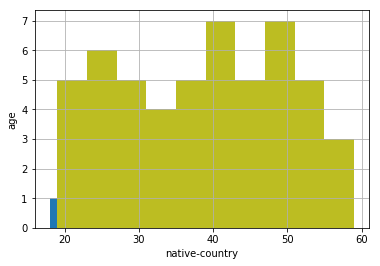

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
sqladb.groupby('native-country')['age'].hist()

plt.xlabel('native-country')
plt.ylabel('age')


<H3> Question 7</H3>
<H4>Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and
'capital-loss' </H4>

In [16]:
pysqldf("SELECT *, ([capital-gain]-[capital-loss]) as [Net-Capital-Gain] FROM sqladb ;")

,age,workclass,fnlwgt,education,educationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Net-Capital-Gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,14084
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,5178
